IMPORTING THE REQUIRED 

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras 

LOADING AND SPLITTING THE DATA 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
print(X_train[0].shape)

(32, 32, 3)


In [7]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


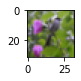

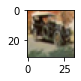

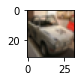

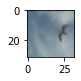

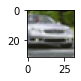

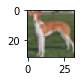

In [8]:

for i in range(300,306):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [9]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [ ]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
# The convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#The hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#The output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=3, validation_data=(X_test, Y_test))

Epoch 1/3
391/391 [==============================] - 544s 1s/step - loss: 1.6610 - accuracy: 0.3894 - val_loss: 1.1859 - val_accuracy: 0.5708
Epoch 2/3
391/391 [==============================] - 540s 1s/step - loss: 1.1703 - accuracy: 0.5829 - val_loss: 1.0106 - val_accuracy: 0.6369
Epoch 3/3
391/391 [==============================] - 540s 1s/step - loss: 0.9784 - accuracy: 0.6582 - val_loss: 0.8340 - val_accuracy: 0.7086


PREDICTING 

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 132ms/step


In [ ]:
print (predictions)

[[6.39754068e-03 7.07248910e-05 5.89625724e-02 1.02521507e-02
  4.10561740e-01 3.21508199e-02 4.93971282e-04 4.80445862e-01
  4.17506933e-04 2.47081654e-04]
 [6.71983603e-03 2.14691414e-03 7.58962780e-02 1.74376950e-01
  9.06912386e-02 4.03538495e-01 1.14527509e-01 1.23553529e-01
  3.85356275e-03 4.69576707e-03]
 [1.10266521e-03 6.45254855e-04 2.73737833e-02 1.18434057e-01
  2.80841393e-03 4.59223278e-02 7.99292326e-01 1.50745071e-03
  2.44302512e-03 4.70744650e-04]
 [1.83746131e-04 7.83478172e-05 2.94756144e-03 8.18809688e-01
  7.89854303e-03 5.29380962e-02 1.15582526e-01 6.70107023e-04
  5.30077028e-04 3.61287646e-04]
 [1.50895130e-03 9.73904431e-01 1.05327558e-06 3.22490496e-06
  6.01594422e-07 1.24068799e-06 7.28898328e-07 1.52912003e-06
  7.04250718e-03 1.75356120e-02]
 [1.23228189e-02 8.33046198e-01 6.13957178e-04 1.25841284e-03
  1.55870424e-04 2.90161377e-04 7.26344297e-04 5.44637915e-05
  1.45207912e-01 6.32392708e-03]
 [1.75589398e-01 1.94386709e-02 2.02519134e-01 2.35651135e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
1.0
0.99999994
0.99999994
1.0000001
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION 

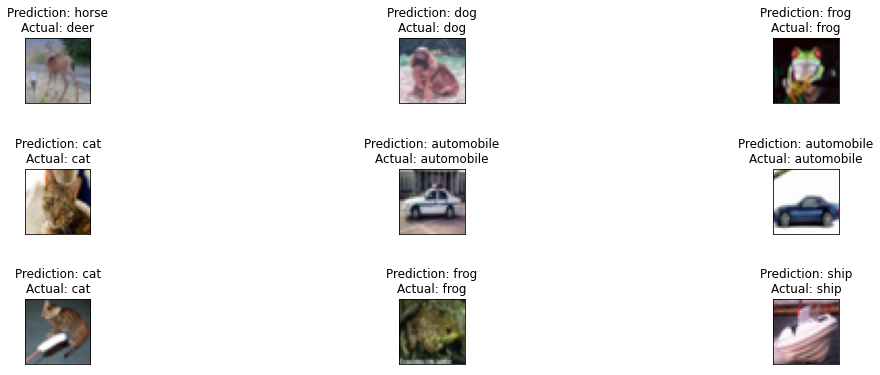

In [ ]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()